In [1]:
import pandas as pd
import numpy as np
from pygobnilp.gobnilp import Gobnilp
import pgmpy
import itertools
from pgmpy.estimators.CITests import log_likelihood
from pgmpy.estimators.CITests import chi_square

In [2]:
def csv_format_discrete(csv_file):
    df = pd.read_csv(csv_file, sep="\s+")
    return df.drop([0])

#returns the csv_file in a pandas dataframe, formatted properly, discrete dataset only

In [55]:
df = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\discrete.dat")
df

,A,B,C,D,E,F
1,b,c,b,a,b,b
2,b,a,c,a,b,b
3,a,a,a,a,a,a
4,a,a,a,a,b,b
5,a,a,b,c,a,a
...,...,...,...,...,...,...
4996,a,a,a,a,a,a
4997,c,c,b,b,c,a
4998,b,b,a,b,c,b
4999,a,c,b,c,c,a


### chi-squared test

In [4]:
#0th order chi2 test
def chi2bool(df):
    '''
    0th order CI test
    '''
    chi2 = []
    v = list(df)
    my_list = list(itertools.combinations(v,2))
    y_0, y_1 = [x[0] for x in my_list], [x[1] for x in my_list]
    for i,j in zip(y_0, y_1):
        chi = chi_square(X=i, Y=j, Z=[], data=df, significance_level=0.05)
        chi2.append((i,j,chi))
    true_0 = [x for x in chi2 if True in x]
    false_0 = [x for x in chi2 if False in x]
    return true_0, false_0

### Sorting Functions

In [5]:
def create_permutations(my_list):
    '''
    takes in a list, remove extra permutations from the list and only creates a pair of permutations
    '''
    p_permutations = []
    new_list = list(set(tuple(sorted(l[:2])) for l in my_list))
    for items in new_list:
        new_list_0 = list(itertools.permutations(items[:2],2))[1]
        p_permutations.append(new_list_0)
    return new_list + p_permutations

In [36]:
#given 2 lists, append them together and remove duplicates
def remove_permutation(list_):
    '''
    returns a sorted list without permutation
    '''
    return sorted(list(set(tuple(sorted(l[:2])) for l in list_)))

### CONDITIONAL MAIN CODE

In [7]:
#1st order CI
def cond_1_generate(df):
    v = list(df)
    p_permutations = list(itertools.permutations(v,3))
    order_0 = create_permutations(chi2bool(df)[0])
    generated = [x for x in p_permutations if x[:2] not in order_0]
    generated_0 = set(tuple(sorted(items[:2])) for items in generated)
    generate_return = [x for x in generated if x[:2] in generated_0]
    return generate_return

In [8]:
def cond_1_test(df):
    chi2_data = []
    phi = cond_1_generate(df)
    for i,j,k in phi:
        chi2 = chi_square(X=i, Y=j, Z=[k], data=df, significance_level=0.05)
        chi2_data.append((i,j,k,chi2))
    true_list = [x for x in chi2_data if True in x]
    false_list = [x for x in chi2_data if False in x]
    return true_list, false_list

In [56]:
%%time
G = create_permutations(chi2bool(df)[0])
len(G), len(chi2bool(df)[0])

CPU times: total: 46.9 ms
Wall time: 52.4 ms


(14, 7)

In [57]:
chi_0, chi_1  = [x[:2] for x in chi2bool(df)[0]],  [x[:2] for x in cond_1_test(df)[0]]
chi_2 = chi_0 + chi_1
len(chi_0), len(chi_1), len(chi_2)

(7, 4, 11)

In [58]:
len(create_permutations(chi_1))

6

In [59]:
p_permute = create_permutations(chi_2)

In [60]:
len(p_permute)

20

In [61]:
x0 = create_permutations([x[:2] for x in chi2bool(df)[0]])
len(x0)

14

In [62]:
%%time
N = 3
n = len(v)
v = list(df)
# remove_list = [x for x in p_permute]
remove_list = create_permutations([x[:2] for x in chi2bool(df)[0]])
empty_list = []
while N <= n:
    list_permutations = [x for x in itertools.permutations(v, N) if x[:2] not in remove_list]
    p_1 = [x[:1] for x in list_permutations]
    p_2 = [x[1:2] for x in list_permutations]
    p = [x[2:] for x in list_permutations]
    for i,j,k in zip(p_1, p_2, p):
        chi2 = chi_square(X=i[0], Y=j[0], Z=k, data=df, significance_level=0.05)
        empty_list.append((i[0],j[0],k,chi2))
    true_list = create_permutations([x[:2] for x in empty_list if True in x])
    remove_list = remove_list + create_permutations(true_list)
    remove_list = create_permutations(remove_list)
    N += 1
#nP3 takes 2minutes to run
#nP4 takes 9-15minutes to run
#nP5 takes ??? minutes to run
#nP6 not doable

CPU times: total: 22.9 s
Wall time: 23.1 s


In [63]:
remove_list

[('B', 'D'),
 ('C', 'E'),
 ('C', 'F'),
 ('A', 'F'),
 ('B', 'F'),
 ('B', 'C'),
 ('A', 'E'),
 ('D', 'F'),
 ('A', 'C'),
 ('D', 'E'),
 ('D', 'B'),
 ('E', 'C'),
 ('F', 'C'),
 ('F', 'A'),
 ('F', 'B'),
 ('C', 'B'),
 ('E', 'A'),
 ('F', 'D'),
 ('C', 'A'),
 ('E', 'D')]

In [64]:
remove_permutation(remove_list)
#22

[('A', 'C'),
 ('A', 'E'),
 ('A', 'F'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'F'),
 ('C', 'E'),
 ('C', 'F'),
 ('D', 'E'),
 ('D', 'F')]

In [65]:
len(remove_list)

20

In [66]:
m = Gobnilp()

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0


**********
BN has score -24028.094778353498
**********
A<- -5502.137377150637
B<-A -3688.9395212202216
C<- -3501.5105385969146
D<-A,C -3555.014444236549
E<-B,F -4310.304956470645
F<- -3470.18794067853
**********
bnlearn modelstring = 
[A][B|A][C][D|A:C][E|B:F][F]
**********
CPDAG:
Vertices: A,B,C,D,E,F
A-B
A->D
B->E
C->D
F->E



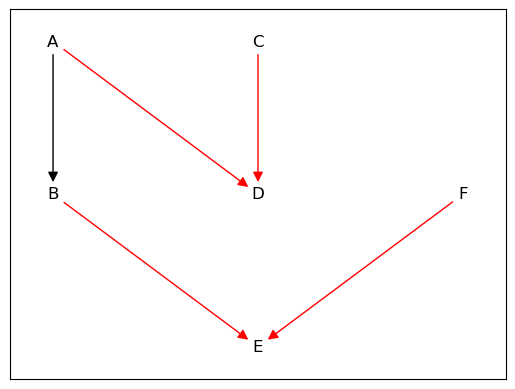

CPU times: total: 219 ms
Wall time: 213 ms


In [68]:
%%time
m.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\discrete.dat')

In [69]:
for i,j in remove_list:
    m.add_forbidden_arrow(i,j)

**********
BN has score -24028.094778353498
**********
A<- -5502.137377150637
B<-A -3688.9395212202216
C<- -3501.5105385969146
D<-A,C -3555.014444236549
E<-B,F -4310.304956470645
F<- -3470.18794067853
**********
bnlearn modelstring = 
[A][B|A][C][D|A:C][E|B:F][F]
**********
CPDAG:
Vertices: A,B,C,D,E,F
A-B
A->D
B->E
C->D
F->E



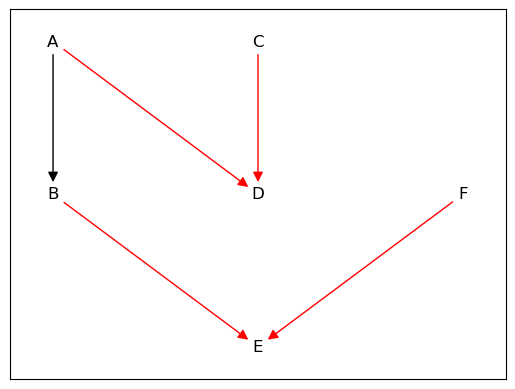

CPU times: total: 62.5 ms
Wall time: 117 ms


In [70]:
%%time
m.learn(start='MIP solution')